# 결정 트리
결정 트리는 회귀와 분류 모두 가능한 지도 학습 모델이다.

결정 트리 모델은 스무고개와 같이 질문을 하나씩 던져 정답을 맞춰가는 모델이다.

## 노드
맨 위의 노드를 루트 노드(root node)라 부르고 맨 아래 끝에 달린 노드를 리프 노드(leaf node)라고 한다.

## 불순도
불순도는 데이터 집합의 불순도를 측정하는 방법이다.

지니 불순도는 클래스의 비율을 제곱해서 더한 다음 1에서 빼면 된다.

### 지니 불순도
예를 들어 지니 불순도가 0이면 노드에 하나의 클래스만 있다는 것이고, 지니 불순도가 1/2면 노드에 정확히 반반씩 존재한다는 것이다.

지니 불순도가 0일때의 노드를 순수 노드라고 부른다.

지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)

### 정보 이득(information gain)
부모와 자식 노드 사이의 불순도 차이를 정보 이득이라고 부른다.

정보이득 = 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) X 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) X 오른쪽 노드 불순도 

### 엔트로피 불순도
엔트로피 불순도 또한 노드의 클래스 비율을 사용하지만 지니 불순도 처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱한다.

엔트로피 불순도 = -음성 클래스 비율 log₂(음성 클래스 비율) - 양성 클래스 비율 X log₂(양성 클래스 비율)

In [19]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [26]:
wine = pd.read_csv("/Users/ujong-yun/Documents/GitHub/machinelearning-deeplearning/wine.csv")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [30]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [31]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [32]:
# 데이터 전처리
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, random_state = 42)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [33]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9973316912972086
0.8516923076923076


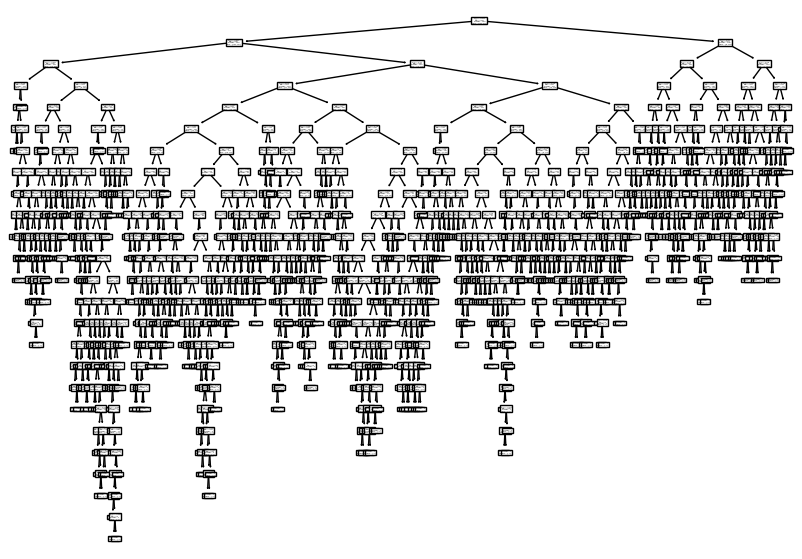

In [34]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

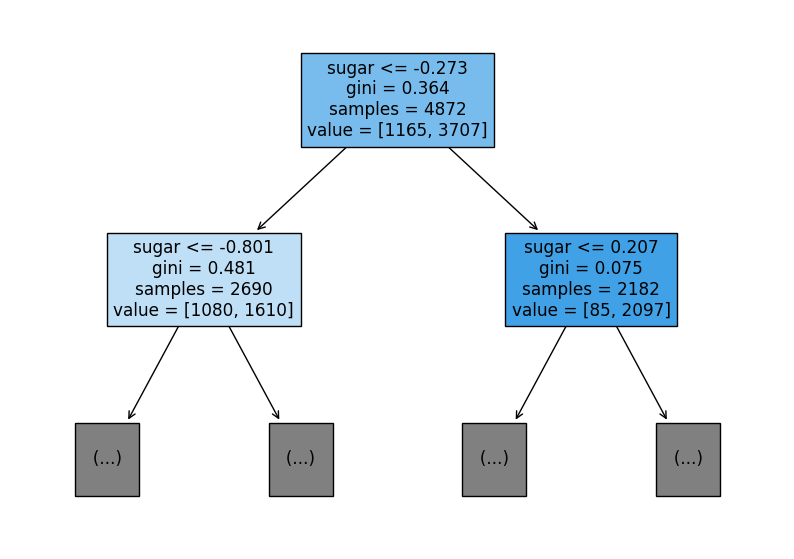

In [36]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
# max_depth : 트리의 깊이 제한
# filled = True : 클래스에 맞게 노드의 색 칠한다.
#feature_names : 특성의 이름을 전달
plt.show()

위 예시에서 value = [1165, 3707]일 때 음성 클래스의 개수가 1165개이고 양성 클래스의 개수가 3707개임을 의미한다.

0.8499589490968801
0.8363076923076923


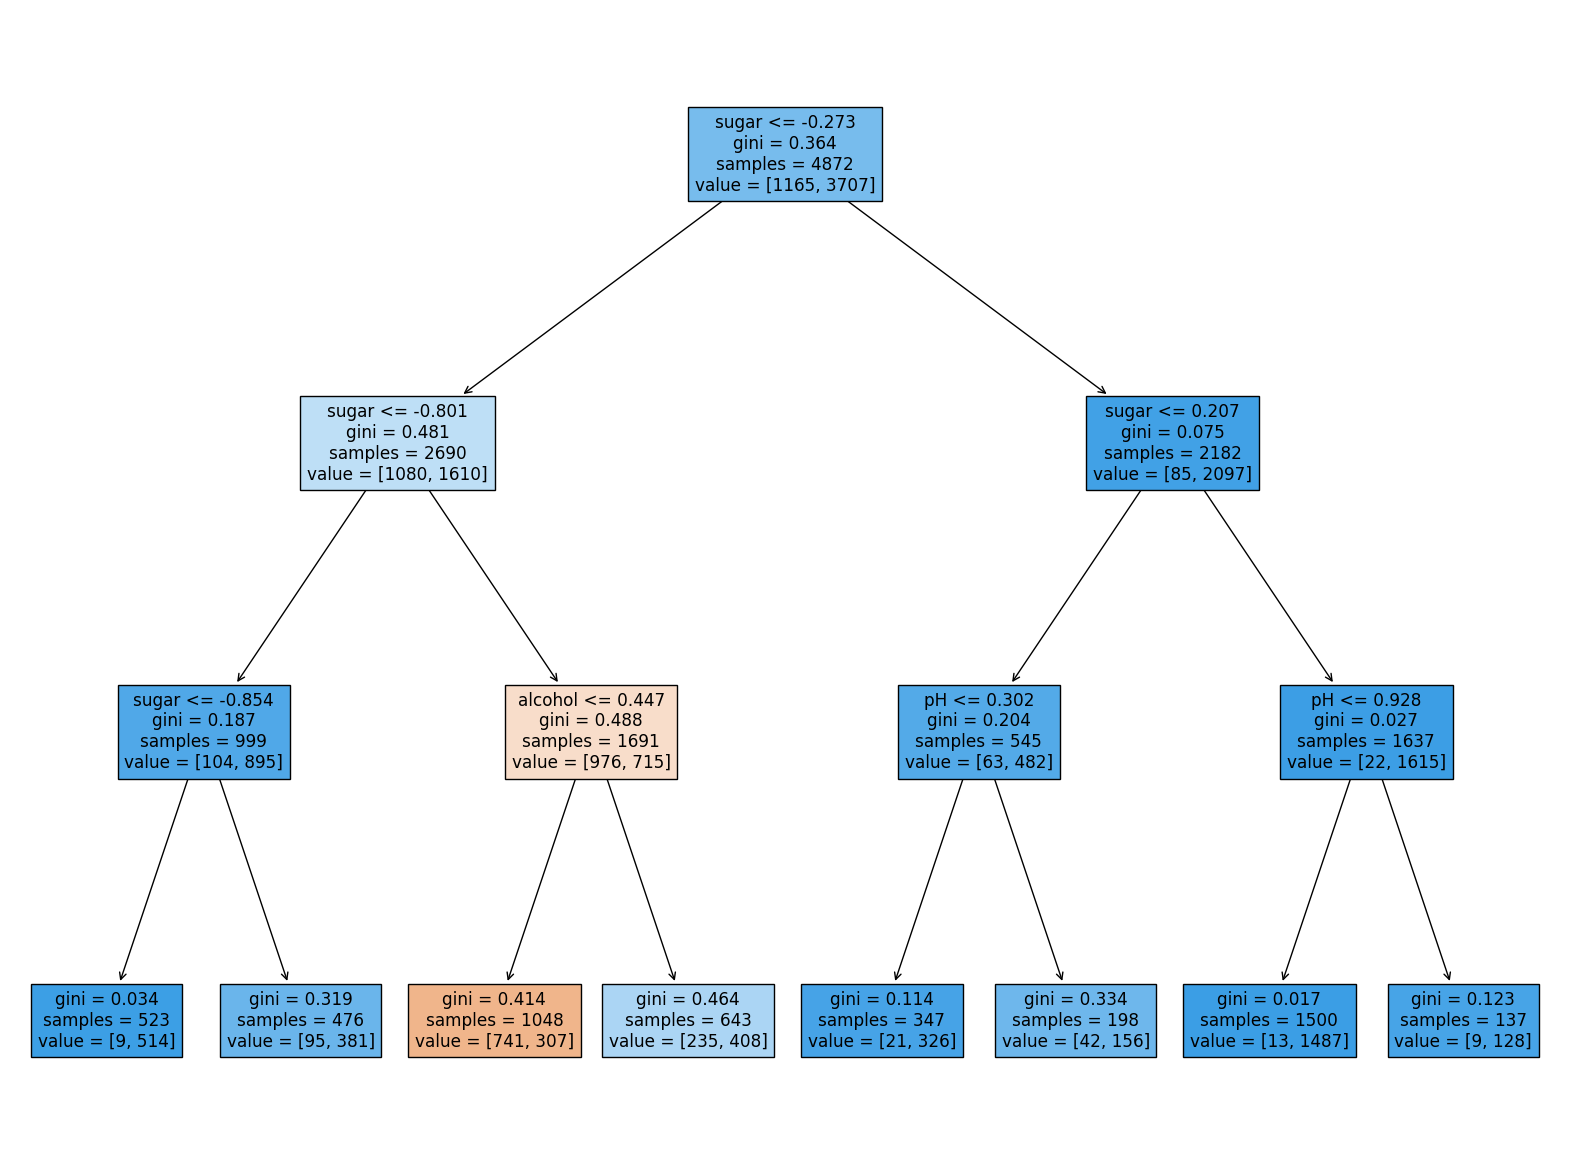

In [38]:
#트리 깊이 조정
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

#시각화
plt.figure(figsize=(20, 15))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [40]:
#음수 값은 스케일링 통해 데이터를 전철리 했기 때문에 나타나다.
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8499589490968801
0.8363076923076923


데이터를 스케일링 한 score 값이랑 스케일링을 하지 않고 훈련을 거친 데이터 세트의 socre값이 같다는 것을 확인할 수 있다.

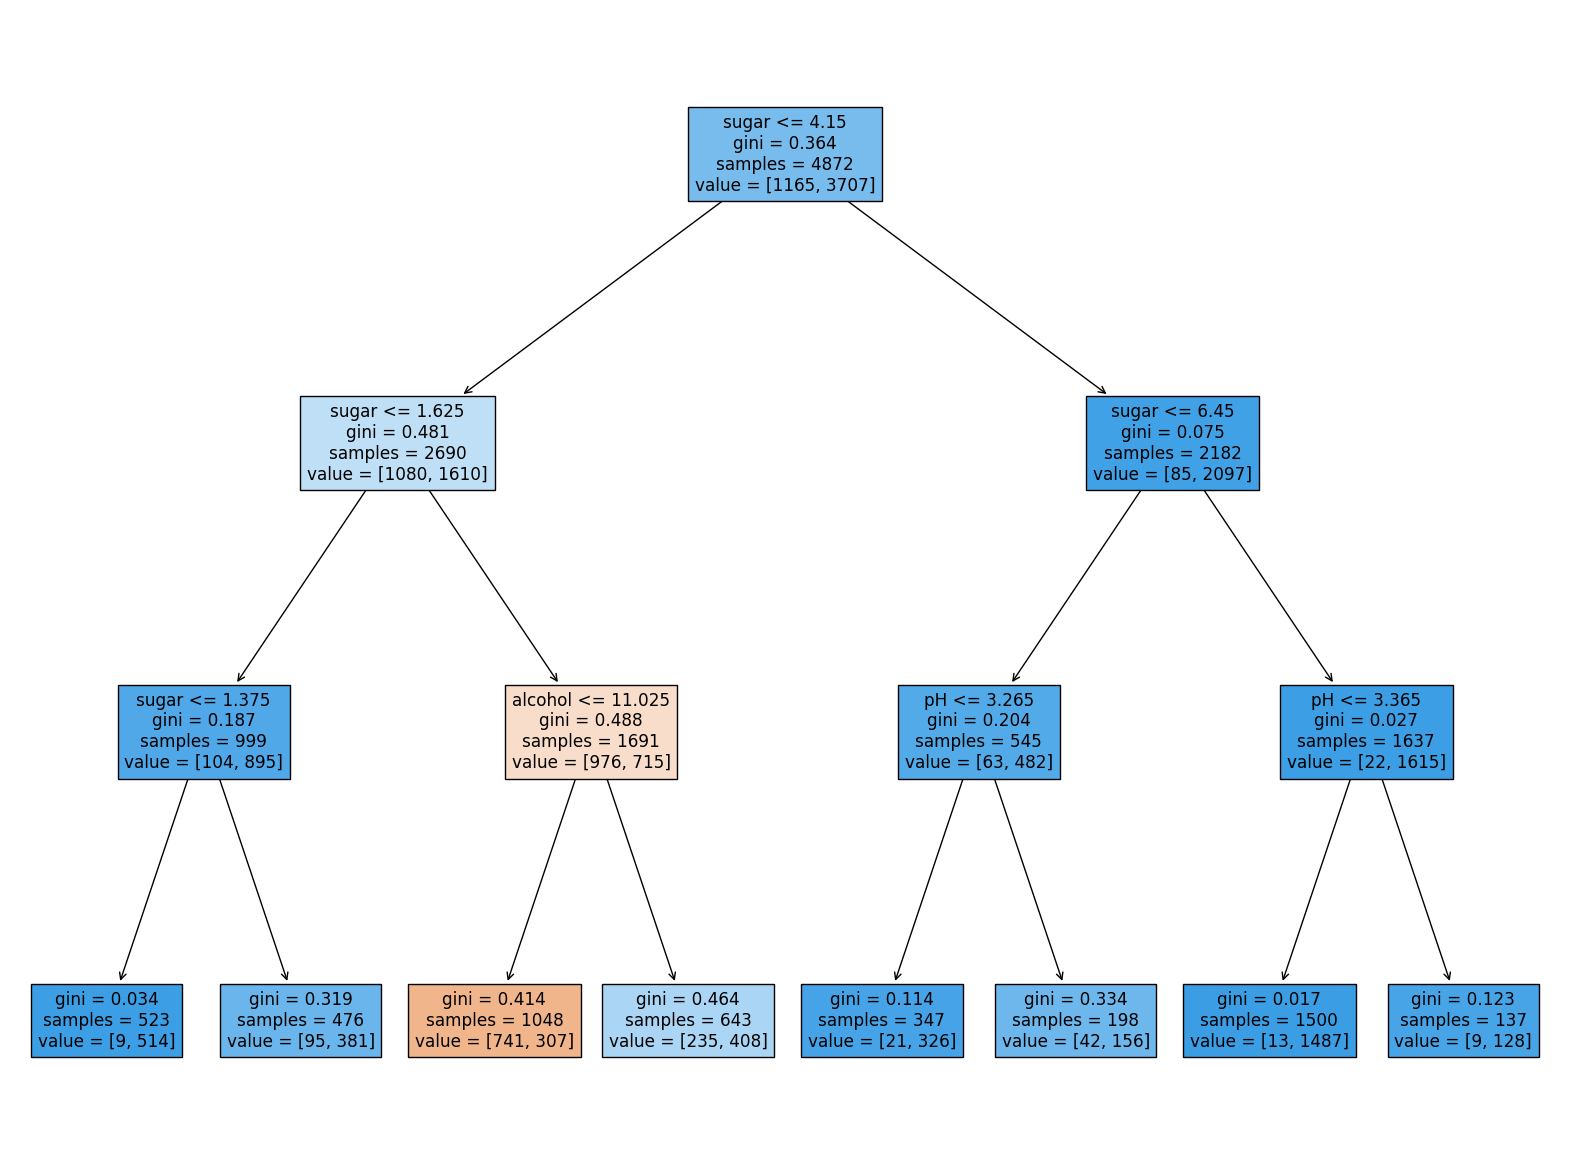

In [41]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [42]:
#feature_importances_매서드를 통해 어느 특성이 중요도가 높은지 확인할 수 있다.
print(dt.feature_importances_)

[0.12871631 0.86213285 0.00915084]
